In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-alcohol-consumption/student-mat.csv
/kaggle/input/student-alcohol-consumption/student-merge.R
/kaggle/input/student-alcohol-consumption/student-por.csv


# Data preprocessing


In [19]:
# imports

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [20]:
# Number of students from both datasets
data_mat = pd.read_csv("/kaggle/input/student-alcohol-consumption/student-mat.csv")
data_por = pd.read_csv("/kaggle/input/student-alcohol-consumption/student-por.csv")



# # Read CSV files with correct delimiter
# data_por = pd.read_csv("/kaggle/input/student-alcohol-consumption/student-mat.csv", sep=",")
# data_mat = pd.read_csv("/kaggle/input/student-alcohol-consumption/student-por.csv", sep=",")

# kolumner som ska merge baseras på är om unika studenter, har inget och göra med ämnen eller skolor
merged_data = pd.merge(data_mat, data_por, on=["school", "sex", "age", "address", "famsize", "Pstatus", 
                                               "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet", "romantic"], suffixes=('_mat', '_por'))

# Check the column names
print("Columns in data_por:", data_por.columns)
print("Columns in data_mat:", data_mat.columns)




Columns in data_por: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Columns in data_mat: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [21]:
import pandas as pd

por_data = pd.DataFrame()
mat_data = pd.DataFrame()

for column in merged_data.columns:
    if column.endswith("_por"):
        # Remove the suffix and add the column to por_data
        new_column_name = column[:-4]  # Remove the last 4 characters ("_por")
        por_data[new_column_name] = merged_data[column]
    elif column.endswith("_mat"):
        # Remove the suffix and add the column to mat_data
        new_column_name = column[:-4]  # Remove the last 4 characters ("_mat")
        mat_data[new_column_name] = merged_data[column]
    else:
        # Add the column to both por_data and mat_data without any changes
        por_data[column] = merged_data[column]
        mat_data[column] = merged_data[column]

# # Example usage
# print("DataFrame for columns with '_por' suffix:")
# print(por_data.head())

# print("\nDataFrame for columns with '_mat' suffix:")
# print(mat_data.head())


In [22]:
# Concatenate the DataFrames row-wise
merged_data = pd.concat([por_data, mat_data])

# Example usage
print("Merged DataFrame:")
print(merged_data.head())



Merged DataFrame:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime goout Dalc Walc  health  absences  G1  G2  G3  
0      4        3     4    1    1       3         4   0  11  11  
1      5        3     3    1    1       3         2   9  11  11  
2      4        3     2    2    3       3         6  12  13  12  
3      3        2     2    1    1       5         0  14  14  14  
4      4        3     2    1    2       5         0  11  13  13  

[5 rows x 33 columns]


In [23]:
merged_data["activities"].value_counts()

activities
yes    392
no     360
Name: count, dtype: int64

In [24]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 752 entries, 0 to 375
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      752 non-null    object
 1   sex         752 non-null    object
 2   age         752 non-null    int64 
 3   address     752 non-null    object
 4   famsize     752 non-null    object
 5   Pstatus     752 non-null    object
 6   Medu        752 non-null    int64 
 7   Fedu        752 non-null    int64 
 8   Mjob        752 non-null    object
 9   Fjob        752 non-null    object
 10  reason      752 non-null    object
 11  nursery     752 non-null    object
 12  internet    752 non-null    object
 13  romantic    752 non-null    object
 14  guardian    752 non-null    object
 15  traveltime  752 non-null    int64 
 16  studytime   752 non-null    int64 
 17  failures    752 non-null    int64 
 18  schoolsup   752 non-null    object
 19  famsup      752 non-null    object
 20  paid        752

In [25]:
# Drop specified columns
columns_to_drop = ["sex", "school", "Pstatus", "famsize", "absences", "internet", 
                   "freetime", "nursery", "famrel", "paid", "romantic", "famsup", "address", "activities", "guardian", "reason", "G2", "G3"]
merged_data = merged_data.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(merged_data)


     age  Medu  Fedu      Mjob      Fjob  traveltime  studytime  failures  \
0     18     4     4   at_home   teacher           2          2         0   
1     17     1     1   at_home     other           1          2         0   
2     15     1     1   at_home     other           1          2         0   
3     15     4     2    health  services           1          3         0   
4     16     3     3     other     other           1          2         0   
..   ...   ...   ...       ...       ...         ...        ...       ...   
371   19     2     3  services     other           1          3         1   
372   18     3     1   teacher  services           1          2         0   
373   18     1     1     other     other           2          2         1   
374   17     3     1  services  services           2          1         0   
375   18     3     2  services     other           3          1         0   

    schoolsup higher  goout  Dalc  Walc  health  G1  
0         yes    yes 

In [26]:
# merged_data["guardian"].value_counts()

# Label Encoding

- lets group some values so that we can encode them as 0 or 1. One hot would make too many dimentions

In [27]:
# merged_data = pd.DataFrame(merged_data)

# # Loop through the "guardian" column
# for idx, value in enumerate(merged_data['guardian']):
#     # Check if the value is 'mother' or 'father'
#     if value in ['mother', 'father']:
#         # Replace the value with 'parents'
#         merged_data.loc[idx, 'guardian'] = 'parents'



In [28]:
merged_data

,age,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,higher,goout,Dalc,Walc,health,G1
0,18,4,4,at_home,teacher,2,2,0,yes,yes,4,1,1,3,0
1,17,1,1,at_home,other,1,2,0,no,yes,3,1,1,3,9
2,15,1,1,at_home,other,1,2,0,yes,yes,2,2,3,3,12
3,15,4,2,health,services,1,3,0,no,yes,2,1,1,5,14
4,16,3,3,other,other,1,2,0,no,yes,2,1,2,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,19,2,3,services,other,1,3,1,no,yes,2,1,2,5,7
372,18,3,1,teacher,services,1,2,0,no,yes,4,1,1,1,7
373,18,1,1,other,other,2,2,1,no,yes,1,1,1,5,6
374,17,3,1,services,services,2,1,0,no,yes,5,3,4,2,14


In [29]:
# Putting the target Variable in 3 equal classes

merged_data["G1"].unique()

import pandas as pd
from sklearn.preprocessing import LabelEncoder


# num of bins
num_bins = 3

# cut the target feature into 6 equal-width bins
merged_data["G1"] = pd.cut(merged_data["G1"], bins=num_bins, labels=False, include_lowest=True)
merged_data["age"] = pd.cut(merged_data["age"], bins = num_bins, labels=False, include_lowest = True)


label_encoder = LabelEncoder()

# Encode the discretized target feature
merged_data["G1"] = label_encoder.fit_transform(merged_data["G1"]) 
merged_data["age"] = label_encoder.fit_transform(merged_data["age"]) 


print("Encoded classes:", label_encoder.classes_)
merged_data["G1"].unique()


Encoded classes: [0 1 2]


array([0, 1, 2])

In [30]:
# use label encode on features with 2 categories

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cols = ["schoolsup", "higher","studytime", "Mjob", "Fjob"]

for column in cols:
    if column in merged_data.columns:
        merged_data[column] = label_encoder.fit_transform(merged_data[column])


In [31]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 752 entries, 0 to 375
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         752 non-null    int64
 1   Medu        752 non-null    int64
 2   Fedu        752 non-null    int64
 3   Mjob        752 non-null    int64
 4   Fjob        752 non-null    int64
 5   traveltime  752 non-null    int64
 6   studytime   752 non-null    int64
 7   failures    752 non-null    int64
 8   schoolsup   752 non-null    int64
 9   higher      752 non-null    int64
 10  goout       752 non-null    int64
 11  Dalc        752 non-null    int64
 12  Walc        752 non-null    int64
 13  health      752 non-null    int64
 14  G1          752 non-null    int64
dtypes: int64(15)
memory usage: 94.0 KB


In [32]:
df = merged_data

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 752 entries, 0 to 375
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         752 non-null    int64
 1   Medu        752 non-null    int64
 2   Fedu        752 non-null    int64
 3   Mjob        752 non-null    int64
 4   Fjob        752 non-null    int64
 5   traveltime  752 non-null    int64
 6   studytime   752 non-null    int64
 7   failures    752 non-null    int64
 8   schoolsup   752 non-null    int64
 9   higher      752 non-null    int64
 10  goout       752 non-null    int64
 11  Dalc        752 non-null    int64
 12  Walc        752 non-null    int64
 13  health      752 non-null    int64
 14  G1          752 non-null    int64
dtypes: int64(15)
memory usage: 94.0 KB


# Correlation matrix last time before modelling

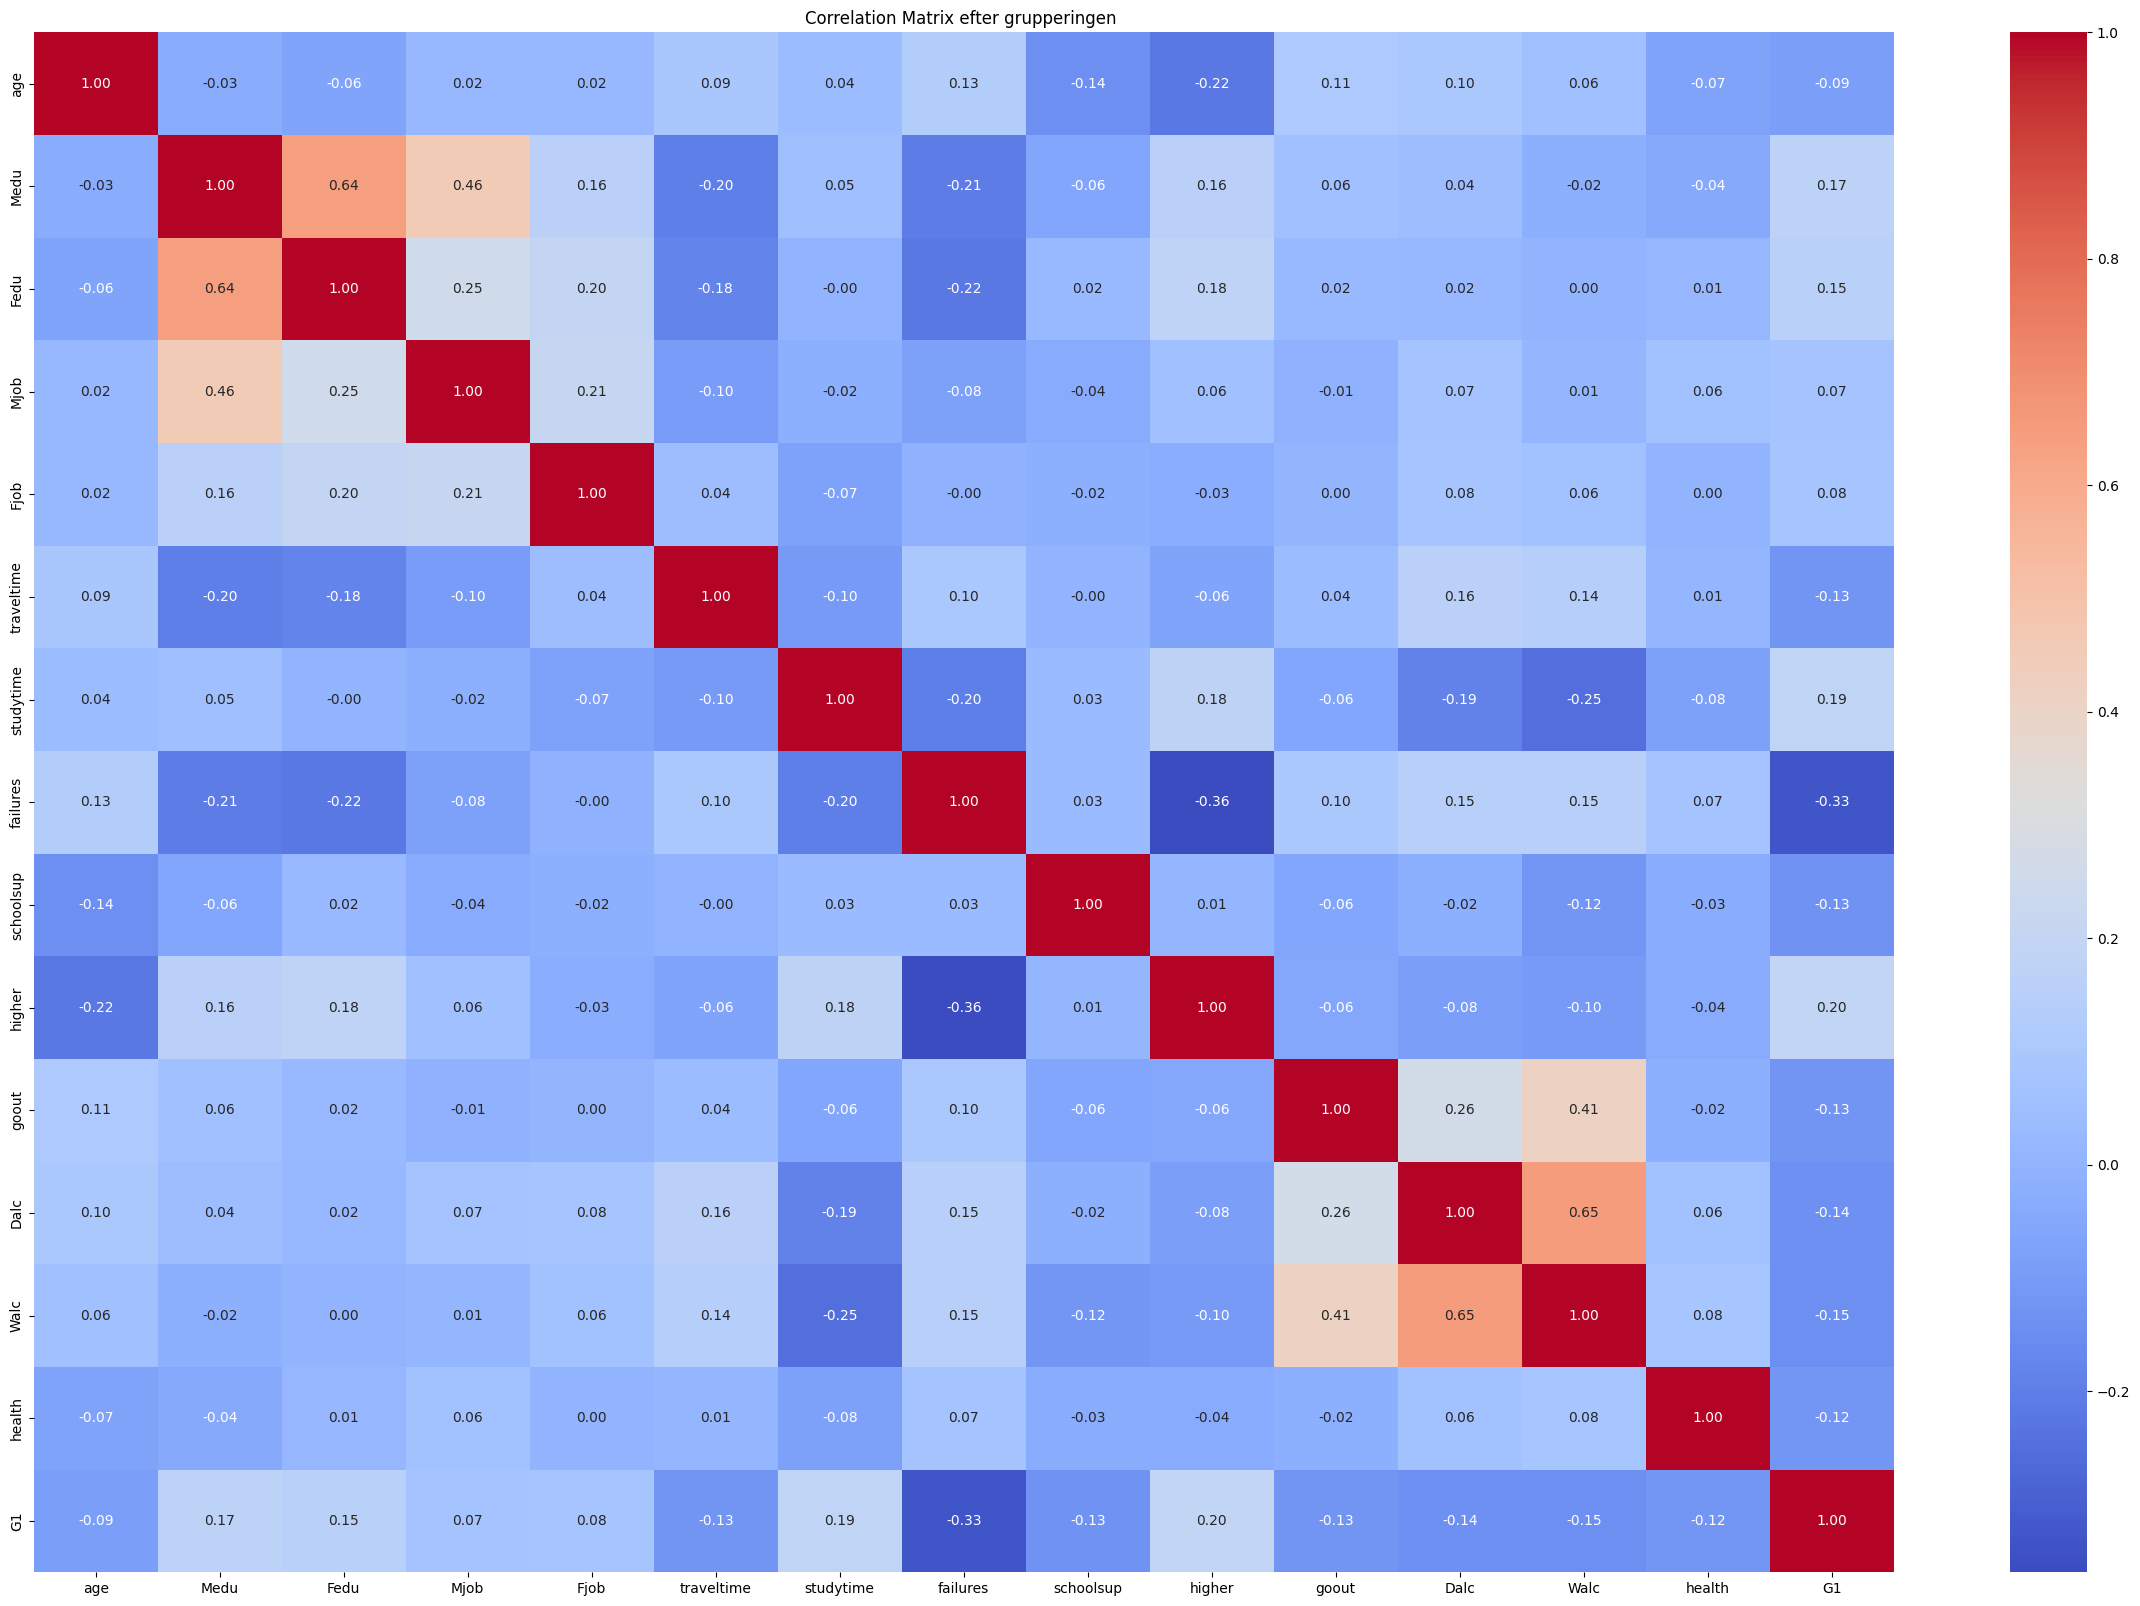

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the transformed data array to a DataFrame with feature names
column_names = df.columns
data = pd.DataFrame(df, columns=column_names)

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=column_names, yticklabels=column_names)
plt.title('Correlation Matrix efter grupperingen ')
plt.show()

# Neurala Nätverk

In [35]:
# splitting X and Y 
# X = df
y = df["G1"]
X = df.drop(columns=['G1'])
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (752, 14)
Shape of y: (752,)


In [36]:
X

,age,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,higher,goout,Dalc,Walc,health
0,1,4,4,0,4,2,1,0,1,1,4,1,1,3
1,0,1,1,0,2,1,1,0,0,1,3,1,1,3
2,0,1,1,0,2,1,1,0,1,1,2,2,3,3
3,0,4,2,1,3,1,2,0,0,1,2,1,1,5
4,0,3,3,2,2,1,1,0,0,1,2,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,1,2,3,3,2,1,2,1,0,1,2,1,2,5
372,1,3,1,4,3,1,1,0,0,1,4,1,1,1
373,1,1,1,2,2,2,1,1,0,1,1,1,1,5
374,0,3,1,3,3,2,0,0,0,1,5,3,4,2


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Input
from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


num_classes = len(np.unique(y))

# Create a Sequential model
model = Sequential()


model.add(Input(shape=(X_train.shape[1],)))

# input layer
model.add(Dense(64, activation='relu'))

# hidden layers
model.add(Dense(42, activation='relu'))
model.add(Dropout(0.1))  # Dropout layer to prevent overfitting
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(num_classes, activation='softmax'))  # Softmax activation for multiclass classification

# Compile the model
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print("")
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("")

# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# classification report
print(classification_report(y_test, predicted_classes))



# 19 % accuracy med oskalad data

#               precision    recall  f1-score   support

#            0       0.61      0.55      0.58        66
#            1       0.78      0.83      0.80       132

#     accuracy                           0.73       198
#    macro avg       0.70      0.69      0.69       198
# weighted avg       0.73      0.73      0.73       198

2024-05-24 20:13:40.028870: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-24 20:13:40.028934: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-24 20:13:40.030634: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5839 - loss: 1.3066 - val_accuracy: 0.5950 - val_loss: 0.9879
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5871 - loss: 0.9616 - val_accuracy: 0.5620 - val_loss: 0.8556
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5654 - loss: 0.8729 - val_accuracy: 0.5455 - val_loss: 0.7923
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6321 - loss: 0.7972 - val_accuracy: 0.5702 - val_loss: 0.7781
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5890 - loss: 0.7958 - val_accuracy: 0.5950 - val_loss: 0.7722
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6418 - loss: 0.7778 - val_accuracy: 0.5950 - val_loss: 0.7661
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6434 - loss: 0.7771 - val_accuracy: 0.6033 - val_loss: 0.7586
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6352 - loss: 0.7686 - val_accuracy: 0.6446 - val_loss

# Plottar resultaten 

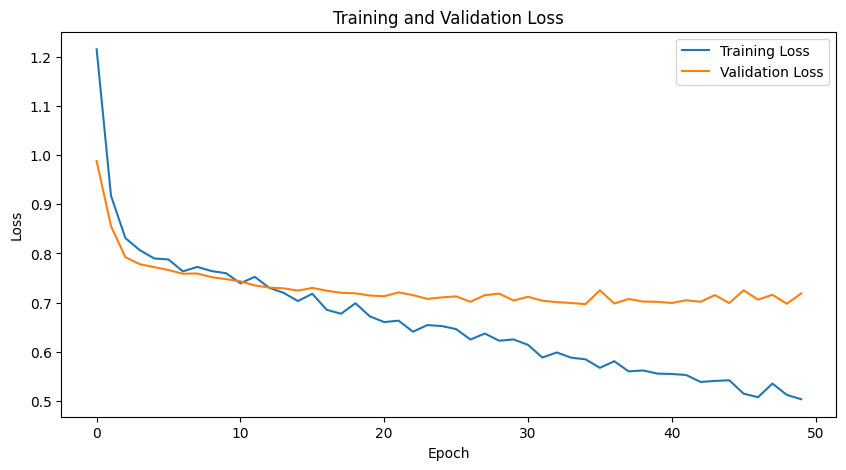

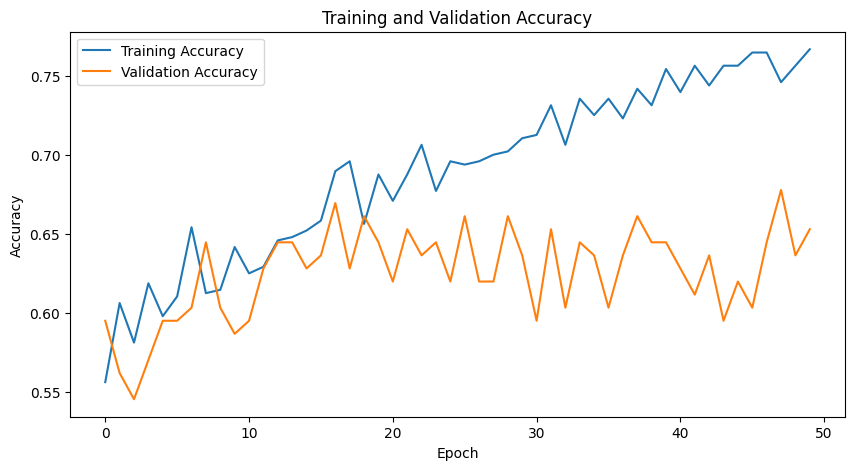

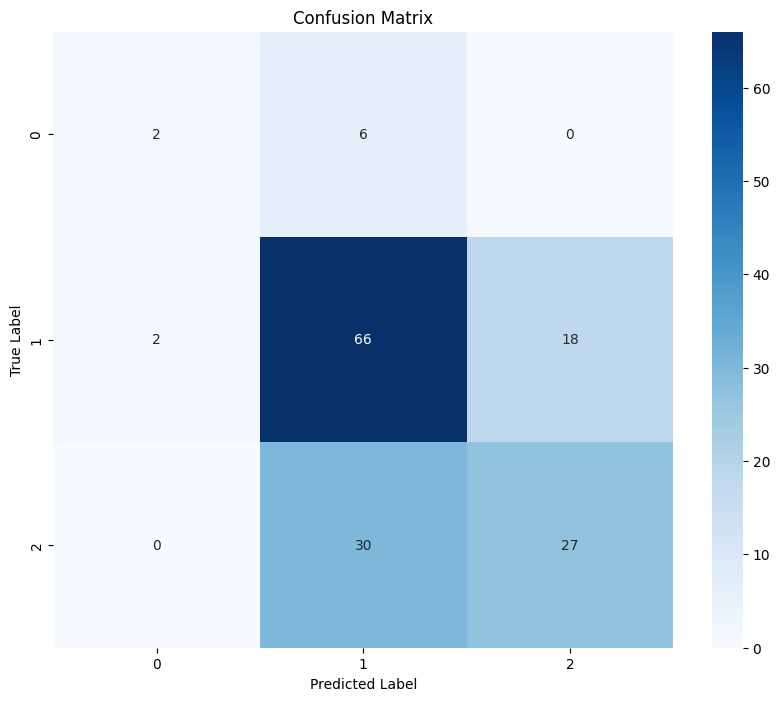

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Plot for training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot for training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# # Make predictions on the validation set
# predictions = model.predict(X_test)
# predicted_classes = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



# Tunar hyperparametrarna med Keras Tuner

In [39]:
# import keras_tuner
from kerastuner.tuners import RandomSearch
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Input

num_classes = len(set(y))

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    
    # Tune the number of layers
    for i in range(hp.Int('num_layers', 1, 5)):  # Tuning for 1 to 3 layers
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='leaky_relu'))  
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))
    
    model.add(Dense(units=num_classes, activation='softmax'))

    # Tune the learning rate for the optimizer
    learning_rate = hp.Choice('learning_rate', values=[1e-4, 1e-3, 1e-2])
    
    # Choose between Adam and Nadam optimizers
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'nadam'])
    if optimizer_choice == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Instantiate the tuner and perform hyperparameter tuning
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Increase this to explore more hyperp combinations
    executions_per_trial=5,
    directory='my_dir',
    project_name='neural_network_11'
)

tuner.search(X_train, y_train,
             epochs=40,
             validation_split=0.3)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=40, validation_split=0.3)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print("")
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("")

# Generate predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Print classification report
print(classification_report(y_test, predicted_classes))




Trial 10 Complete [00h 01m 11s]
val_accuracy: 0.6751381278038024

Best val_accuracy So Far: 0.6817679524421691
Total elapsed time: 00h 08m 22s
Epoch 1/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4967 - loss: 1.0078 - val_accuracy: 0.5912 - val_loss: 0.7880
Epoch 2/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5573 - loss: 0.8568 - val_accuracy: 0.5856 - val_loss: 0.8188
Epoch 3/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6002 - loss: 0.7835 - val_accuracy: 0.6354 - val_loss: 0.7464
Epoch 4/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6557 - loss: 0.7668 - val_accuracy: 0.6519 - val_loss: 0.7519
Epoch 5/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6079 - loss: 0.7956 - val_accuracy: 0.6519 - val_loss: 0.7454
Epoch 6/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6363 - loss: 0.7529 - val_accuracy: 0.5691 - val_loss: 0.7544
Epoch 7/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5980 - loss: 0.7775 - val_accuracy: 

# Plottar resultaten 

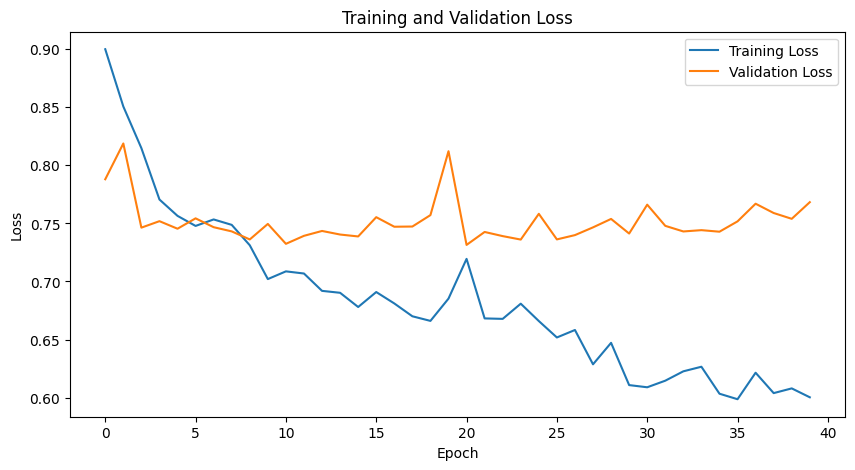

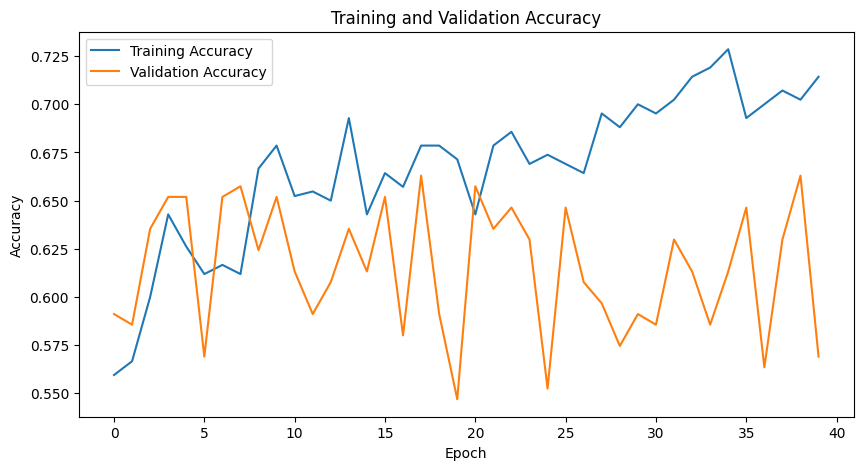

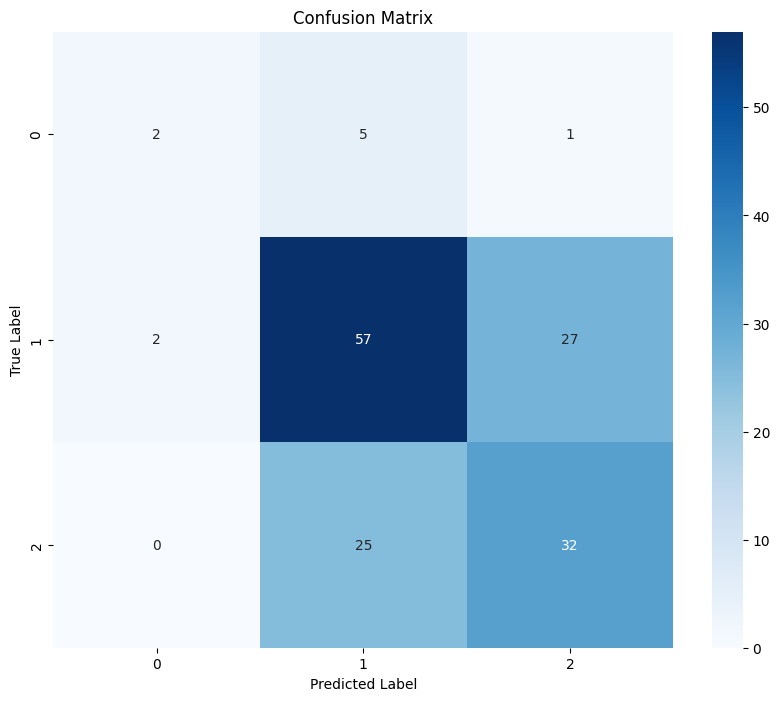

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Plot for training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot for training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Not needed
# predictions = model.predict(X_test)
# predicted_classes = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

